# UTS

In [1]:
import pandas as pd
import math

In [2]:
dataUTS = pd.read_csv("https://raw.githubusercontent.com/ZuniAmandaDewi/dataset/main/dataR2.csv")

In [3]:
dataUTS

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


##Naive Bayes

In [4]:
# Memisahkan dataset dalam variabel independen dan dependen
X = dataUTS.iloc[:,:4].values
y = dataUTS['Classification'].values

In [5]:
# Memisahkan dataset menjadi Training set dan Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [6]:
# Fitur Scaling untuk membawa variabel dalam satu skala
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
# Memasang Klasifikasi Naive Bayes ke set Pelatihan dengan kernel linier
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [8]:
# Memprediksi hasil set Tes
y_pred = nvclassifier.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 2]


In [9]:
import numpy as np

In [10]:
# melihat nilai aktual dan prediksi berdampingan
y_compare = np.vstack((y_test,y_pred)).T
# nilai aktual di sisi kiri dan nilai prediksi di sisi kanan
# mencetak 5 nilai teratas
y_compare[:5,:]

array([[2, 1],
       [1, 1],
       [2, 1],
       [2, 1],
       [1, 1]])

In [11]:
# Membuat Matriks confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  1]
 [ 9  4]]


In [12]:
# menemukan akurasi dari matriks confusion
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))      

Correct predictions:  14
False predictions 10


Accuracy of the Naive Bayes Clasification is:  0.5833333333333334


##Decision Tree

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#mengetahui jumlah data setiap  class
dataUTS.Classification.value_counts()

2    64
1    52
Name: Classification, dtype: int64

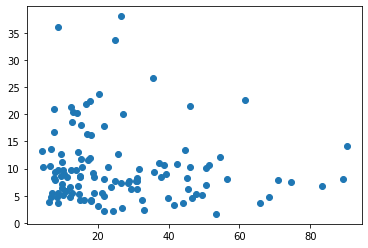

In [15]:
#Memvisualisasikan fitur kumpulan data untuk menemukan pola untuk menyelesaikan tugas

plt.scatter(dataUTS['Leptin'],dataUTS['Adiponectin'])
plt.show()

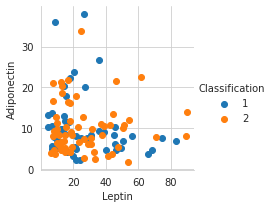

In [16]:
#Menggunakan Seaborn lib untuk memvisualisasikan 2 fitur berdasarkan variabel target.

sns.set_style('whitegrid')
sns.FacetGrid(dataUTS, hue = 'Classification') \
   .map(plt.scatter, 'Leptin','Adiponectin') \
   .add_legend()

plt.show()

In [17]:
dataUTS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


[Text(0.3804347826086957, 0.95, 'X[0] <= 7.306\ngini = 0.481\nsamples = 72\nvalue = [29, 43]'),
 Text(0.33695652173913043, 0.85, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.42391304347826086, 0.85, 'X[0] <= 15.017\ngini = 0.465\nsamples = 68\nvalue = [25, 43]'),
 Text(0.17391304347826086, 0.75, 'X[1] <= 9.757\ngini = 0.308\nsamples = 21\nvalue = [4, 17]'),
 Text(0.13043478260869565, 0.65, 'X[0] <= 7.933\ngini = 0.375\nsamples = 16\nvalue = [4, 12]'),
 Text(0.08695652173913043, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.17391304347826086, 0.55, 'X[1] <= 9.552\ngini = 0.32\nsamples = 15\nvalue = [3, 12]'),
 Text(0.13043478260869565, 0.45, 'X[1] <= 5.454\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(0.08695652173913043, 0.35, 'X[1] <= 4.919\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.043478260869565216, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.13043478260869565, 0.25, 'X[0] <= 12.515\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 T

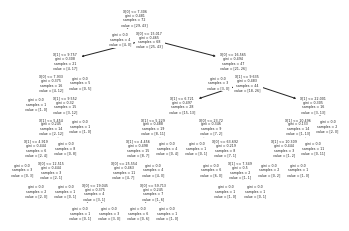

In [18]:
#Sekarang coba buat model untuk menyelesaikan tugas kita
#Sesuai analisis kami, kami tidak dapat menemukan banyak informasi dari fitur baru yang dapat membantu dalam memecahkan masalah kami ...
#Untuk menyelesaikan tugas kami, saya telah memilih beberapa fitur di antara semuanya untuk membangun model terbaik kami..

'''Impor beberapa perpustakaan untuk membuat pengklasifikasi pohon keputusan dan memvisualisasikan struktur pohon'''

from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score


'''Di sini kita memisahkan variabel independen atau variabel target dari dataset Iris'''


X = dataUTS[['Leptin', 'Adiponectin']]
y = dataUTS['Classification']


#Sebelum melatih model, kami telah membagi data kami menjadi Kumpulan Data Latihan Aktual dan Kumpulan Data Uji Aktual untuk tujuan pelatihan dan validasi...

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)

#spliting data into validation train and validation test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)


'''Sekarang kami telah membuat pengklasifikasi pohon keputusan dan melatihnya dengan dataset pelatihan.'''


Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(Xt, Yt)

#Memvisualisasikan Pohon yang terbentuk pada dataset kereta

tree.plot_tree(Iris_clf)

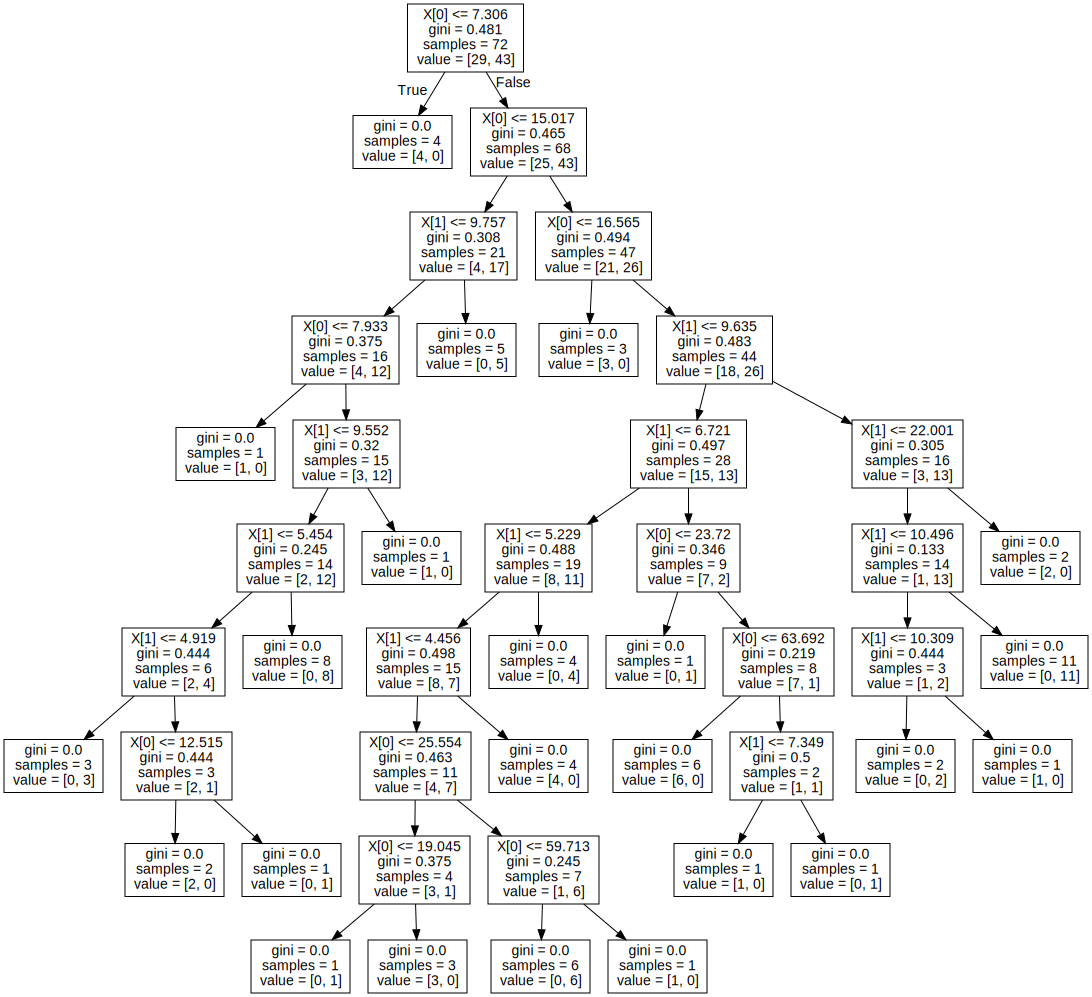

In [19]:
#Memvisualisasikan Pohon Keputusan menggunakan pustaka graphviz

dot_data = tree.export_graphviz(Iris_clf, out_file=None)

graph = graphviz.Source(dot_data)
graph

In [20]:
#Karena model kami telah dilatih....
#Sekarang kita dapat memvalidasi pohon keputusan kita menggunakan metode validasi silang untuk mendapatkan akurasi atau skor kinerja model kita.

print('Accuracy score is:',cross_val_score(Iris_clf, Xt, Yt, cv=3, scoring='accuracy').mean())

Accuracy score is: 0.5


In [21]:
#Memeriksa data uji validasi pada model terlatih kami dan mendapatkan metrik kinerja

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

Y_hat = Iris_clf.predict(Xcv)


print('Accuracy score for validation test data is:',accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv , Y_hat)

Accuracy score for validation test data is: 0.3333333333333333


array([[[1, 2],
        [4, 2]],

       [[2, 4],
        [2, 1]]])

In [22]:
#Memeriksa kinerja model kami pada data uji aktual yang tidak terlihat..
YT_hat = Iris_clf.predict(Xtest)
YT_hat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 62.857142857142854 %


array([[[12,  6],
        [ 7, 10]],

       [[10,  7],
        [ 6, 12]]])

[Text(0.54, 0.95, 'X[0] <= 7.306\ngini = 0.491\nsamples = 81\nvalue = [35, 46]'),
 Text(0.5, 0.85, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.58, 0.85, 'X[1] <= 9.757\ngini = 0.481\nsamples = 77\nvalue = [31, 46]'),
 Text(0.32, 0.75, 'X[1] <= 6.79\ngini = 0.5\nsamples = 49\nvalue = [24, 25]'),
 Text(0.2, 0.65, 'X[1] <= 5.454\ngini = 0.452\nsamples = 29\nvalue = [10, 19]'),
 Text(0.16, 0.55, 'X[1] <= 4.783\ngini = 0.496\nsamples = 22\nvalue = [10, 12]'),
 Text(0.08, 0.45, 'X[0] <= 19.045\ngini = 0.444\nsamples = 15\nvalue = [5, 10]'),
 Text(0.04, 0.35, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.12, 0.35, 'X[0] <= 25.554\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(0.08, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.16, 0.25, 'X[1] <= 3.726\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.12, 0.15, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.2, 0.15, 'X[0] <= 36.28\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.16, 0.05, 'gini = 0

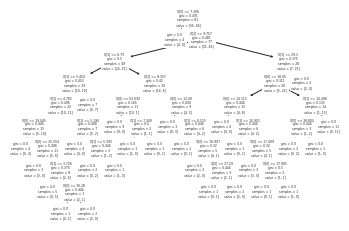

In [23]:
'''Model pelatihan pada data kereta yang sebenarnya... '''
Iris_Fclf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_Fclf.fit(Xtrain, Ytrain)

#Visualisasikan struktur pohon..
tree.plot_tree(Iris_Fclf)

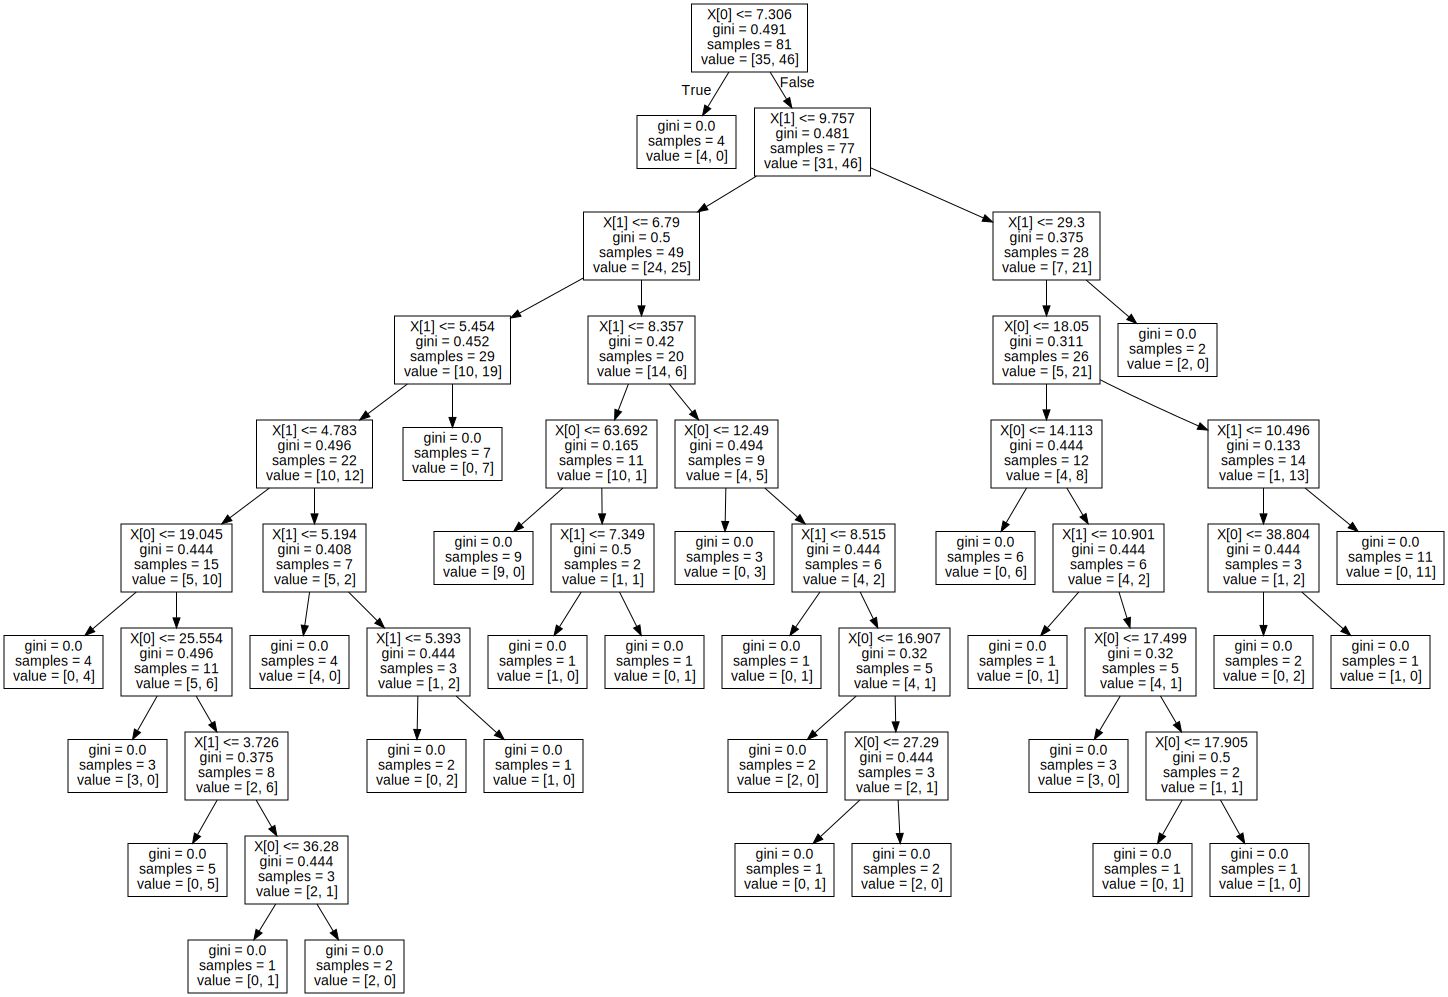

In [24]:
#Pembuatan pohon keputusan akhir untuk diterapkan dalam kasus dunia nyata....

dot_data = tree.export_graphviz(Iris_Fclf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [25]:
#Memeriksa performa model pada data Uji Aktual...

YT_Fhat = Iris_Fclf.predict(Xtest)
YT_Fhat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_Fhat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_Fhat)

Model Accuracy Score on totally unseen data(Xtest) is: 42.857142857142854 %


array([[[ 9,  9],
        [11,  6]],

       [[ 6, 11],
        [ 9,  9]]])

In [26]:
#Pengujian untuk poin baru kecuali dari Dataset

Test_point = [[10.4,3.0],
             [6.5,2.8],
             [5.1,2.5],
             [5.1,3.3],
             [6.0,2.7],
             [6.0,2.2]]

print(Iris_Fclf.predict(Test_point))

[2 1 1 1 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
